## Load modules

In [18]:
import sklearn
from sklearn import feature_selection
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc, make_scorer
acc = make_scorer(accuracy_score)
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [19]:
import random

def sampleData(DataFrame, ratio):
    df_size = len(DataFrame.index)
    sample_size = int(round(ratio * df_size))
    if sample_size == df_size:
        sample_size = sample_size - 1
        indexes = random.sample(range(df_size), sample_size)
        sample = DataFrame.iloc[indexes, : ]
        return sample

    elif sample_size == 0:
        sample_size = 1
        indexes = random.sample(range(df_size), sample_size)
        sample = DataFrame.iloc[indexes, : ]
        return sample

    else:
        indexes = random.sample(range(df_size), sample_size)
        sample = DataFrame.iloc[indexes, : ]
        return sample

## Loading data

In [20]:
atlas = pd.read_csv('tissue_predictor_healthy_atlas_shotgun_nofluid.csv')

In [21]:
atlas = atlas.fillna(0)

In [22]:
atlas.shape

(1128, 4015)

In [23]:
## Separating X and y
X = atlas.copy()
y = X.pop('tissue_name')

In [24]:
X

,A0A075B6H7,A0A075B6H9,A0A075B6Q5,A0A0A0MS15,A0A0B4J1U7,A0A0B4J1V0,A0A0B4J1V6,A0A0C4DH38,A0A0C4DH42,A0A0G2JMI3,...,Q9Y6Q1,Q9Y6R1,Q9Y6U3,Q9Y6V0,Q9Y6W3,Q9Y6W5,Q9Y6X5,Q9Y6X8,Q9Y6X9,Q9Y6Y8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000368,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000310,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000149,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000194,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000892,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000364,0.0,0.0,0.0,0.000358,0.000000,0.0,0.0,0.0,0.000291
1124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000295,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000189
1125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000620,0.0,0.0,0.0,0.000195,0.000000,0.0,0.0,0.0,0.000079
1126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000112,0.0,0.0,0.0,0.000088,0.000000,0.0,0.0,0.0,0.000000


## Baseline model

In [25]:
import random

def sampleData(DataFrame, ratio):
    df_size = len(DataFrame.index)
    sample_size = int(round(ratio * df_size))
    if sample_size == df_size:
        sample_size = sample_size - 1
        indexes = random.sample(range(df_size), sample_size)
        sample = DataFrame.iloc[indexes, : ]
        return sample

    elif sample_size == 0:
        sample_size = 1
        indexes = random.sample(range(df_size), sample_size)
        sample = DataFrame.iloc[indexes, : ]
        return sample

    else:
        indexes = random.sample(range(df_size), sample_size)
        sample = DataFrame.iloc[indexes, : ]
        return sample

In [26]:
train_df = pd.DataFrame()
test_df = pd.DataFrame()
validation_df = pd.DataFrame()

tissues = atlas['tissue_name'].unique()
DataFrameDict = {elem : pd.DataFrame for elem in tissues}
for key in DataFrameDict.keys():
    DataFrameDict[key] = atlas[:][atlas['tissue_name'] == key]

for key in DataFrameDict.keys():
    train = sampleData(DataFrameDict[key], 0.85)
    train_df = train_df.append(train)

    test = DataFrameDict[key].drop(train.index)
    test_df = test_df.append(test)

y_train = train_df.pop('tissue_name').values
X_train = train_df.values
y_test = test_df.pop('tissue_name').values
X_test = test_df.values

X_train = pd.DataFrame(X_train, columns=(atlas.columns)[:-1])
X_test = pd.DataFrame(X_test, columns=(atlas.columns)[:-1])


In [27]:
result_df = pd.DataFrame(columns=['model', 'Accuracy', 'f1_macro', 'precision_macro', 'recall_macro', 'f1_weighted', 'precision_weighted', 'recall_weighted'])

forest = RandomForestClassifier(random_state=0, oob_score=True)
forest.fit(X_train, y_train)

predictions =  forest.predict(X_test)

oob = forest.oob_score_
fm = f1_score(y_test, predictions, average="macro")
fw = f1_score(y_test, predictions, average="weighted")
acc = accuracy_score(y_test, predictions)
pw = precision_score(y_test, predictions, average='weighted')
pm = precision_score(y_test, predictions, average='macro')
rw = recall_score(y_test, predictions, average='weighted')
rm = recall_score(y_test, predictions, average='macro')

df_length = len(result_df)
result_df.loc[df_length] = ['RandomForest_baseline', acc, fm, pm, rm, fw, pm, rw]

/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
result_df

,model,Accuracy,f1_macro,precision_macro,recall_macro,f1_weighted,precision_weighted,recall_weighted
0,RandomForest_baseline,0.982456,0.920909,0.926407,0.928322,0.98,0.926407,0.982456


## Univariate feature selection
Selects based on a statistical test

* SelectKBest removes all but the k-highest scoring features
* SelectPercentile removes all but a user-specified highest scoring percentage of features using common univariate statistical tests for each feature: false positive rate SelectFpr, false discovery rate SelectFdr, or family wise error SelectFwe.
* GenericUnivariateSelect allows to perform univariate feature selection with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator.

In [8]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import GenericUnivariateSelect
from scipy import stats

## ANOAV F-score and p-values

In [10]:
def make_f_scores(X, y):
    f = f_classif(X, y)
    f_scores = f[0]
    p_values = f[1]
    f_scores = pd.Series(f_scores, name="ANOVA F-Scores", index=X.columns)
    f_scores = f_scores.sort_values(ascending=False)
    p_values = pd.Series(p_values, name="ANOVA p-values", index=X.columns)
    p_values = p_values.sort_values(ascending=False)
    return f_scores, p_values

In [11]:
f,p = make_f_scores(X, y)

/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

In [12]:
f_df = pd.DataFrame(f)
f_df = f_df.dropna()
f_df['ANOVA F-Scores CumSum'] = f_df['ANOVA F-Scores'].cumsum()
f_df['Fraction'] = f_df['ANOVA F-Scores']/sum(f_df['ANOVA F-Scores'])
f_df['Cumulative Fraction'] = f_df['Fraction'].cumsum()
f_df

,ANOVA F-Scores,ANOVA F-Scores CumSum,Fraction,Cumulative Fraction
A0A075B6H7,inf,inf,NaN,NaN
Q8WVT3,inf,inf,NaN,NaN
Q92692,inf,inf,NaN,NaN
Q15768,inf,inf,NaN,NaN
Q15834,inf,inf,NaN,NaN
...,...,...,...,...
P02538,0.720996,inf,0.0,0.0
O95678,0.720252,inf,0.0,0.0
Q9UKK3,0.707144,inf,0.0,0.0
P19012,0.683959,inf,0.0,0.0


In [13]:
indexlist = f_df['Cumulative Fraction']<= 0.95
f_df_95= f_df[indexlist]
f_df_95

,ANOVA F-Scores,ANOVA F-Scores CumSum,Fraction,Cumulative Fraction
Q2M1Z3,265620.622890,inf,0.0,0.0
Q5EG05,218853.667652,inf,0.0,0.0
P05976,203344.637801,inf,0.0,0.0
Q9NUG6,203344.637801,inf,0.0,0.0
Q7L1T6,203344.637801,inf,0.0,0.0
...,...,...,...,...
P02538,0.720996,inf,0.0,0.0
O95678,0.720252,inf,0.0,0.0
Q9UKK3,0.707144,inf,0.0,0.0
P19012,0.683959,inf,0.0,0.0


In [14]:
f_score_95_features = f_df_95.index

In [15]:
X_f95 = X[f_score_95_features]

In [16]:
p_df = pd.DataFrame(p)
p_df = p_df.dropna()
p_df['p-values CumSum'] = p_df['ANOVA p-values'].cumsum()
p_df['Fraction'] = p_df['ANOVA p-values']/sum(p_df['ANOVA p-values'])
p_df['Cumulative Fraction'] = p_df['Fraction'].cumsum()
p_df

,ANOVA p-values,p-values CumSum,Fraction,Cumulative Fraction
P98082,0.986943,0.986943,0.109611,0.109611
P19012,0.938807,1.925751,0.104265,0.213876
Q9UKK3,0.920805,2.846555,0.102266,0.316142
O95678,0.909212,3.755768,0.100978,0.417120
P02538,0.908523,4.664290,0.100902,0.518022
...,...,...,...,...
Q53QZ3,0.000000,9.004046,0.000000,1.000000
Q99525,0.000000,9.004046,0.000000,1.000000
Q99538,0.000000,9.004046,0.000000,1.000000
Q53LP3,0.000000,9.004046,0.000000,1.000000


In [17]:
indexlist = p_df['Cumulative Fraction']<= 0.95
p_df_95= p_df[indexlist]
p_df_95

,ANOVA p-values,p-values CumSum,Fraction,Cumulative Fraction
P98082,0.986943,0.986943,0.109611,0.109611
P19012,0.938807,1.925751,0.104265,0.213876
Q9UKK3,0.920805,2.846555,0.102266,0.316142
O95678,0.909212,3.755768,0.100978,0.417120
P02538,0.908523,4.664290,0.100902,0.518022
P04259,0.792121,5.456412,0.087974,0.605996
P20930,0.685729,6.142141,0.076158,0.682153
Q6UWP8,0.670395,6.812536,0.074455,0.756608
Q9NSB2,0.649201,7.461737,0.072101,0.828709
O94925,0.519756,7.981493,0.057725,0.886434


In [18]:
p_score_95_features = p_df_95.index

In [19]:
X_p95 = X[p_score_95_features]

## Calculating mutual information
This is the most optimal method of feature selection as it measures the reduction in 

In [20]:
from sklearn.feature_selection import mutual_info_classif

In [21]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [22]:
mi_scores = make_mi_scores(X, y)
mi_scores

P13796        0.880638
P05109        0.848905
P05164        0.835597
P06702        0.822695
P13645        0.809058
                ...   
Q15911        0.000000
Q16143        0.000000
Q16186        0.000000
Q16558        0.000000
A0A075B6H7    0.000000
Name: MI Scores, Length: 4142, dtype: float64

In [23]:
mi_scores_frame = pd.DataFrame(mi_scores)
mi_scores_frame = mi_scores_frame.dropna()
mi_scores_frame['MI Scores CumSum'] = mi_scores_frame['MI Scores'].cumsum()
mi_scores_frame['Fraction'] = mi_scores_frame['MI Scores']/sum(mi_scores_frame['MI Scores'])
mi_scores_frame['Cumulative Fraction'] = mi_scores_frame['Fraction'].cumsum()
mi_scores_frame

,MI Scores,MI Scores CumSum,Fraction,Cumulative Fraction
P13796,0.880638,0.880638,0.001283,0.001283
P05109,0.848905,1.729543,0.001236,0.002519
P05164,0.835597,2.565140,0.001217,0.003736
P06702,0.822695,3.387834,0.001198,0.004934
P13645,0.809058,4.196893,0.001178,0.006113
...,...,...,...,...
Q15911,0.000000,686.562549,0.000000,1.000000
Q16143,0.000000,686.562549,0.000000,1.000000
Q16186,0.000000,686.562549,0.000000,1.000000
Q16558,0.000000,686.562549,0.000000,1.000000


In [24]:
indexlist = mi_scores_frame['MI Scores']>0
mi_frame_0 = mi_scores_frame[indexlist]
mi_frame_0

,MI Scores,MI Scores CumSum,Fraction,Cumulative Fraction
P13796,0.880638,0.880638,1.282676e-03,0.001283
P05109,0.848905,1.729543,1.236457e-03,0.002519
P05164,0.835597,2.565140,1.217074e-03,0.003736
P06702,0.822695,3.387834,1.198281e-03,0.004934
P13645,0.809058,4.196893,1.178419e-03,0.006113
...,...,...,...,...
Q9BQ13,0.000221,686.562067,3.223784e-07,0.999999
Q96ED9,0.000213,686.562280,3.103060e-07,1.000000
Q96HC4,0.000143,686.562423,2.084182e-07,1.000000
Q9UBU3,0.000108,686.562532,1.578369e-07,1.000000


In [25]:
indexlist = mi_scores_frame['Cumulative Fraction']<= 0.95
mi_scores_95= mi_scores_frame[indexlist]
mi_scores_95

,MI Scores,MI Scores CumSum,Fraction,Cumulative Fraction
P13796,0.880638,0.880638,0.001283,0.001283
P05109,0.848905,1.729543,0.001236,0.002519
P05164,0.835597,2.565140,0.001217,0.003736
P06702,0.822695,3.387834,0.001198,0.004934
P13645,0.809058,4.196893,0.001178,0.006113
...,...,...,...,...
P15529,0.092498,651.807369,0.000135,0.949378
Q99808,0.092451,651.899820,0.000135,0.949513
Q9UHB7,0.092192,651.992012,0.000134,0.949647
Q86W56,0.092088,652.084099,0.000134,0.949781


In [26]:
mi_score_95_features = mi_scores_95.index
X_mi95 = X[mi_score_95_features]

In [27]:
def build_rf(atlas_values, atlas_tissue, filtering_method):
    atlas = pd.concat([atlas_values, atlas_tissue], axis=1)
    train_df = pd.DataFrame()
    test_df = pd.DataFrame()
    tissues = atlas['tissue_name'].unique()
    DataFrameDict = {elem : pd.DataFrame for elem in tissues}
    for key in DataFrameDict.keys():
        DataFrameDict[key] = atlas[:][atlas['tissue_name'] == key]

    for key in DataFrameDict.keys():
        train = sampleData(DataFrameDict[key], 0.85)
        train_df = train_df.append(train)

        test = DataFrameDict[key].drop(train.index)
        test_df = test_df.append(test)

    y_train = train_df.pop('tissue_name').values
    X_train = train_df.values
    y_test = test_df.pop('tissue_name').values
    X_test = test_df.values

    # Build a forest and compute the feature importances
    forest = RandomForestClassifier(random_state=0, oob_score=True)
    forest.fit(X_train, y_train)

    predictions =  forest.predict(X_test)

    oob = forest.oob_score_
    f1 = f1_score(y_test, predictions, average="weighted")
    acc= accuracy_score(y_test, predictions)
    results_list = []
    results_list.extend([filtering_method, oob, f1, acc])

    return results_list

In [28]:
methods = [X_f95, X_p95, X_mi95]
names = ['ANOVA-F', 'ANOVA-P', 'Mutual information']

In [29]:
results_df = pd.DataFrame(columns=['filtering', 'oob_score', 'f1_score', 'accuracy'])
for i in range(len(methods)):
    print(i)
    m = methods[i]
    filter = names[i]
    print(filter)
    results_list = build_rf(m, y, filter)
    print(results_list)
    df_length = len(results_df)
    results_df.loc[df_length] = results_list

0
ANOVA-F
['ANOVA-F', 0.9635231316725978, 0.9308622321928172, 0.9468599033816425]
1
ANOVA-P
['ANOVA-P', 0.44395017793594305, 0.44329960699525917, 0.47342995169082125]
2
Mutual information
['Mutual information', 0.9572953736654805, 0.9329200123029016, 0.9516908212560387]


In [30]:
results_df

,filtering,oob_score,f1_score,accuracy
0,ANOVA-F,0.963523,0.930862,0.946860
1,ANOVA-P,0.443950,0.443300,0.473430
2,Mutual information,0.957295,0.932920,0.951691


From these three feature selection methods, the mutual information method presents the best metrics

## Select KBest

### f-classif selection

In [32]:
X_kbest = X.copy(deep=True)
results_df_kbest_f = pd.DataFrame(columns=['filtering', 'oob_score', 'f1_score', 'accuracy'])
for i in range(100, 4142, 100):
    selector = SelectKBest(f_classif, k=i)
    selector.fit(X_kbest, y)
    cols = selector.get_support(indices=True)
    X_kbest_new_f = X_kbest.iloc[:,cols]
    print(X_kbest_new_f.shape)

    results_list = build_rf(X_kbest_new_f, y, str(i))
    df_length = len(results_df_kbest_f)
    results_df_kbest_f.loc[df_length] = results_list


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 100)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 200)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 300)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 400)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 500)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 600)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 700)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 800)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 900)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 1000)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 1100)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 1200)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 1300)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 1400)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 1500)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 1600)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 1700)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 1800)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 1900)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2000)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2100)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2200)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2300)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2400)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2500)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2600)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2700)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2800)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2900)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 3000)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 3100)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 3200)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 3300)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 3400)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 3500)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 3600)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 3700)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 3800)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 3900)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 4000)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 4100)


In [33]:
results_df_kbest_f.shape

(41, 4)

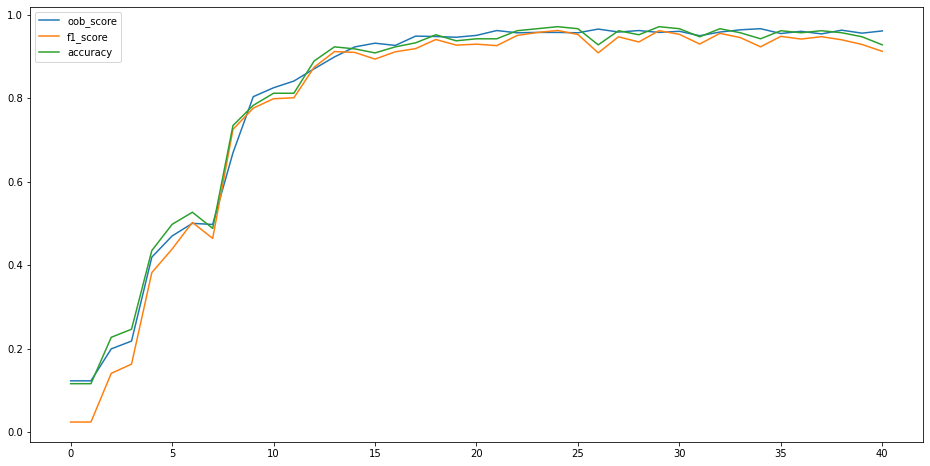

In [34]:
results_df_kbest_f.plot(figsize=(16,8))

In [35]:
# There is a peak around 8000 features
results_df_kbest_f.iloc[20:26,:]
# ==> optimal around 7700 features, look into more detail

,filtering,oob_score,f1_score,accuracy
20,2100,0.950178,0.929184,0.942029
21,2200,0.961744,0.925609,0.942029
22,2300,0.956406,0.949964,0.961353
23,2400,0.957295,0.957095,0.966184
24,2500,0.957295,0.961985,0.971014
25,2600,0.956406,0.952349,0.966184


In [36]:
X_kbest = X.copy(deep=True)
results_df_kbest_f2 = pd.DataFrame(columns=['filtering', 'oob_score', 'f1_score', 'accuracy'])
for i in range(2250, 2600, 10):
    selector = SelectKBest(f_classif, k=i)
    selector.fit(X_kbest, y)
    cols = selector.get_support(indices=True)
    X_kbest_new_f2 = X_kbest.iloc[:,cols]
    print(X_kbest_new_f2.shape)

    results_list = build_rf(X_kbest_new_f2, y, str(i))
    df_length = len(results_df_kbest_f2)
    results_df_kbest_f2.loc[df_length] = results_list


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2250)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2260)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2270)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2280)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2290)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2300)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2310)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2320)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2330)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2340)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2350)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2360)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2370)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2380)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2390)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2400)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2410)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2420)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2430)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2440)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2450)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2460)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2470)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2480)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2490)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2500)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2510)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2520)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2530)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2540)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2550)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2560)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2570)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2580)


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [   0    2    3    9   10   15   23   24   31   38   43   47   50   75
   78   84   96  101  115  116  123  131  145  155  159  162  163  197
  217  218  226  230  239  281  282  284  285  287  312  319  330  347
  363  376  397  420  427  448  463  471  494  497  512  513  529  530
  532  553  554  583  587  588  590  592  595  613  619  628  632  642
  694  697  706  746  751  752  762  788  799  820  841  852  855  863
  865  885  930  937  956  964  978 1018 1060 1071 1074 1097 1104 1163
 1181 1191 1224 1231 1236 1248 1258 1286 1295 1322 1333 1336 1345 1348
 1360 1383 1386 1398 1403 1407 1414 1439 1462 1465 1484 1508 1517 1525
 1527 1528 1533 1542 1550 1570 1583 1587 1605 1613 1614 1618 1628 1641
 1651 1674 1675 1697 1698 1707 1733 1753 1767 1784 1792 1824 1828 1844
 1846 1859 1860 1885 1897 1901 1907 1908 1920 1931 1934 1940 1944 

(1331, 2590)


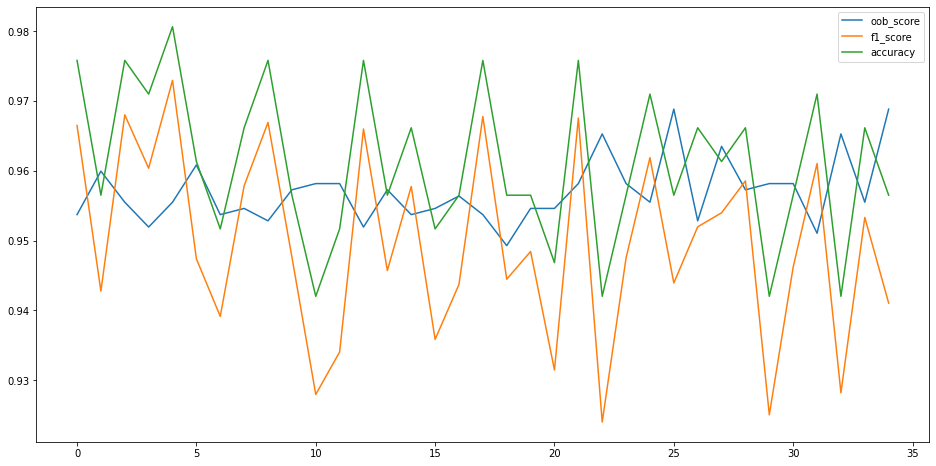

In [37]:
results_df_kbest_f2.plot(figsize=(16,8))

In [38]:
results_df_kbest_f2
#clearly 7760 features is the optimal

,filtering,oob_score,f1_score,accuracy
0,2250,0.953737,0.966511,0.975845
1,2260,0.959964,0.942772,0.956522
2,2270,0.955516,0.968033,0.975845
3,2280,0.951957,0.960390,0.971014
4,2290,0.955516,0.972986,0.980676
5,2300,0.960854,0.947400,0.961353
6,2310,0.953737,0.939148,0.951691
7,2320,0.954626,0.957863,0.966184
8,2330,0.952847,0.966951,0.975845
9,2340,0.957295,0.947688,0.956522


In [86]:
X_kbest = X.copy(deep=True)
results_df_kbest_f_final = pd.DataFrame(columns=['filtering', 'oob_score', 'f1_score', 'accuracy'])
selector = SelectKBest(f_classif, k=761)
selector.fit(X_kbest, y)
cols = selector.get_support(indices=True)
X_kbest_new_f_final = X_kbest.iloc[:,cols]
print(X_kbest_new_f_final.shape)

results_list = build_rf(X_kbest_new_f_final, y, str(i))
df_length = len(results_df_kbest_f_final)
results_df_kbest_f_final.loc[df_length] = results_list


,filtering,oob_score,f1_score,accuracy
0,7650,0.919507,0.894140,0.912602
1,7660,0.912618,0.901490,0.920732
2,7670,0.913343,0.904763,0.924797
3,7680,0.912255,0.902502,0.920732
4,7690,0.910442,0.889984,0.910569
5,7700,0.910805,0.899491,0.916667
6,7710,0.909355,0.891707,0.910569
7,7720,0.914793,0.886528,0.902439
8,7730,0.911893,0.908214,0.926829
9,7740,0.911893,0.894270,0.914634


### mutual_info classif

In [71]:
X_kbest = X.copy(deep=True)
results_df_kbest_mi = pd.DataFrame(columns=['filtering', 'oob_score', 'f1_score', 'accuracy'])
for i in range(100, 11629, 100):
    selector = SelectKBest(mutual_info_classif, k=i)
    selector.fit(X_kbest, y)
    cols = selector.get_support(indices=True)
    X_kbest_new_mi = X_kbest.iloc[:,cols]
    print(X_kbest_new_mi.shape)

    results_list = build_rf(X_kbest_new_mi, y, str(i))
    df_length = len(results_df_kbest_mi)
    results_df_kbest_mi.loc[df_length] = results_list


(3250, 100)
(3250, 200)
(3250, 300)
(3250, 400)
(3250, 500)
(3250, 600)
(3250, 700)
(3250, 800)
(3250, 900)
(3250, 1000)
(3250, 1100)
(3250, 1200)
(3250, 1300)
(3250, 1400)
(3250, 1500)
(3250, 1600)
(3250, 1700)
(3250, 1800)
(3250, 1900)
(3250, 2000)
(3250, 2100)
(3250, 2200)
(3250, 2300)
(3250, 2400)
(3250, 2500)
(3250, 2600)
(3250, 2700)
(3250, 2800)
(3250, 2900)
(3250, 3000)
(3250, 3100)
(3250, 3200)
(3250, 3300)
(3250, 3400)
(3250, 3500)
(3250, 3600)
(3250, 3700)
(3250, 3800)
(3250, 3900)
(3250, 4000)
(3250, 4100)
(3250, 4200)
(3250, 4300)
(3250, 4400)
(3250, 4500)
(3250, 4600)
(3250, 4700)
(3250, 4800)
(3250, 4900)
(3250, 5000)
(3250, 5100)
(3250, 5200)
(3250, 5300)
(3250, 5400)
(3250, 5500)
(3250, 5600)
(3250, 5700)
(3250, 5800)
(3250, 5900)
(3250, 6000)
(3250, 6100)
(3250, 6200)
(3250, 6300)
(3250, 6400)
(3250, 6500)
(3250, 6600)
(3250, 6700)
(3250, 6800)
(3250, 6900)
(3250, 7000)
(3250, 7100)
(3250, 7200)
(3250, 7300)
(3250, 7400)
(3250, 7500)
(3250, 7600)
(3250, 7700)
(3250, 7

In [72]:
results_df_kbest_mi.shape

(116, 4)

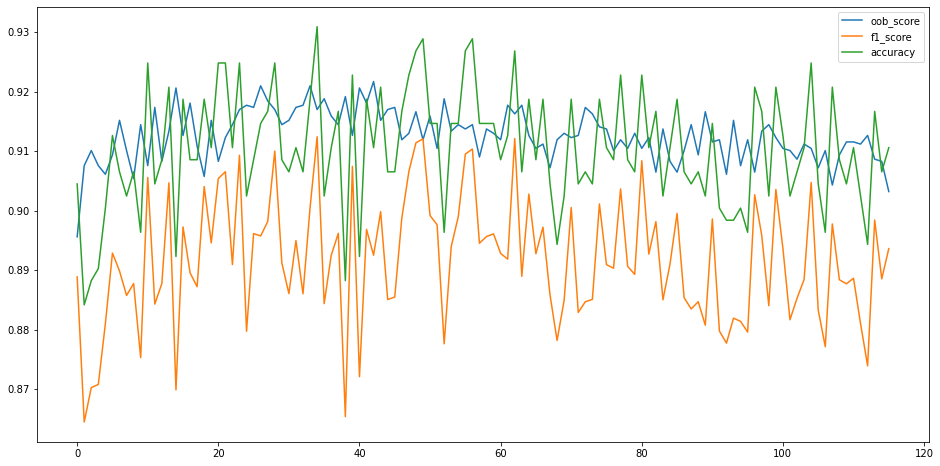

In [73]:
results_df_kbest_mi.plot(figsize=(16,8))

In [77]:
results_df_kbest_mi.iloc[35:41,:]
# There is a peak around 4000 features
# ==> optimal around 4000 features, look into more detail

,filtering,oob_score,f1_score,accuracy
35,3600,0.918782,0.884356,0.902439
36,3700,0.915881,0.892483,0.910569
37,3800,0.914431,0.896176,0.916667
38,3900,0.919144,0.865356,0.888211
39,4000,0.912618,0.907420,0.922764
40,4100,0.920595,0.872075,0.892276


In [82]:
X_kbest = X.copy(deep=True)
results_df_kbest_mi2 = pd.DataFrame(columns=['filtering', 'oob_score', 'f1_score', 'accuracy'])
for i in range(3900, 4100, 10):
    selector = SelectKBest(mutual_info_classif, k=i)
    selector.fit(X_kbest, y)
    cols = selector.get_support(indices=True)
    X_kbest_new_mi2 = X_kbest.iloc[:,cols]
    print(X_kbest_new_mi2.shape)

    results_list = build_rf(X_kbest_new_mi2, y, str(i))
    df_length = len(results_df_kbest_mi2)
    results_df_kbest_mi2.loc[df_length] = results_list


(3250, 3900)
(3250, 3910)
(3250, 3920)
(3250, 3930)
(3250, 3940)
(3250, 3950)
(3250, 3960)
(3250, 3970)
(3250, 3980)
(3250, 3990)
(3250, 4000)
(3250, 4010)
(3250, 4020)
(3250, 4030)
(3250, 4040)
(3250, 4050)
(3250, 4060)
(3250, 4070)
(3250, 4080)
(3250, 4090)


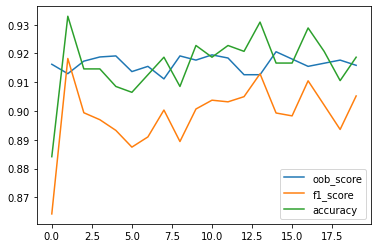

In [83]:
results_df_kbest_mi2.plot()

In [84]:
results_df_kbest_mi2
#3910 features is the most optimal

,filtering,oob_score,f1_score,accuracy
0,3900,0.916244,0.864267,0.884146
1,3910,0.912980,0.918257,0.932927
2,3920,0.917331,0.899409,0.914634
3,3930,0.918782,0.896987,0.914634
4,3940,0.919144,0.893276,0.908537
5,3950,0.913706,0.887468,0.906504
6,3960,0.915518,0.891012,0.912602
7,3970,0.911168,0.900351,0.918699
8,3980,0.919144,0.889414,0.908537
9,3990,0.917694,0.900713,0.922764


### chi2

In [74]:
X_kbest = X.copy(deep=True)
results_df_kbest_chi2 = pd.DataFrame(columns=['filtering', 'oob_score', 'f1_score', 'accuracy'])
for i in range(100, 11629, 100):
    selector = SelectKBest(mutual_info_classif, k=i)
    selector.fit(X_kbest, y)
    cols = selector.get_support(indices=True)
    X_kbest_new_chi = X_kbest.iloc[:,cols]
    print(X_kbest_new_chi.shape)

    results_list = build_rf(X_kbest_new_chi, y, str(i))
    df_length = len(results_df_kbest_chi2)
    results_df_kbest_chi2.loc[df_length] = results_list

(3250, 100)
(3250, 200)
(3250, 300)
(3250, 400)
(3250, 500)
(3250, 600)
(3250, 700)
(3250, 800)
(3250, 900)
(3250, 1000)
(3250, 1100)
(3250, 1200)
(3250, 1300)
(3250, 1400)
(3250, 1500)
(3250, 1600)
(3250, 1700)
(3250, 1800)
(3250, 1900)
(3250, 2000)
(3250, 2100)
(3250, 2200)
(3250, 2300)
(3250, 2400)
(3250, 2500)
(3250, 2600)
(3250, 2700)
(3250, 2800)
(3250, 2900)
(3250, 3000)
(3250, 3100)
(3250, 3200)
(3250, 3300)
(3250, 3400)
(3250, 3500)
(3250, 3600)
(3250, 3700)
(3250, 3800)
(3250, 3900)
(3250, 4000)
(3250, 4100)
(3250, 4200)
(3250, 4300)
(3250, 4400)
(3250, 4500)
(3250, 4600)
(3250, 4700)
(3250, 4800)
(3250, 4900)
(3250, 5000)
(3250, 5100)
(3250, 5200)
(3250, 5300)
(3250, 5400)
(3250, 5500)
(3250, 5600)
(3250, 5700)
(3250, 5800)
(3250, 5900)
(3250, 6000)
(3250, 6100)
(3250, 6200)
(3250, 6300)
(3250, 6400)
(3250, 6500)
(3250, 6600)
(3250, 6700)
(3250, 6800)
(3250, 6900)
(3250, 7000)
(3250, 7100)
(3250, 7200)
(3250, 7300)
(3250, 7400)
(3250, 7500)
(3250, 7600)
(3250, 7700)
(3250, 7

In [75]:
results_df_kbest_chi2

,filtering,oob_score,f1_score,accuracy
0,100,0.893764,0.882594,0.896341
1,200,0.905366,0.883714,0.898374
2,300,0.910442,0.881924,0.900407
3,400,0.908629,0.881040,0.902439
4,500,0.910805,0.885459,0.904472
...,...,...,...,...
111,11200,0.907179,0.890276,0.908537
112,11300,0.910080,0.879935,0.900407
113,11400,0.909717,0.882823,0.902439
114,11500,0.910080,0.878216,0.900407


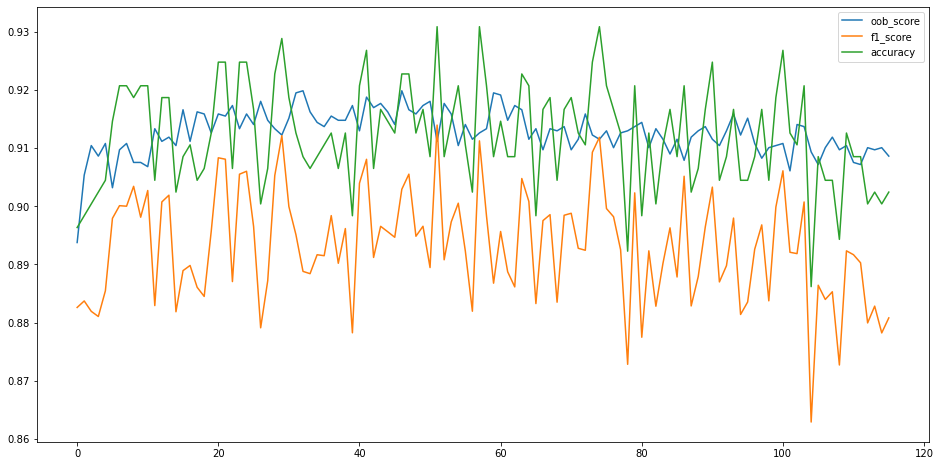

In [76]:
results_df_kbest_chi2.plot(figsize=(16,8))

In [79]:
results_df_kbest_chi2.iloc[55:62,:]
# ==> optimal around 6100 features, look into more detail

,filtering,oob_score,f1_score,accuracy
55,5600,0.914068,0.892311,0.910569
56,5700,0.911530,0.881945,0.902439
57,5800,0.912618,0.911256,0.930894
58,5900,0.913343,0.898323,0.920732
59,6000,0.919507,0.886770,0.908537
60,6100,0.919144,0.895665,0.914634
61,6200,0.914793,0.888729,0.908537


In [80]:
X_kbest = X.copy(deep=True)
results_df_kbest_chi3 = pd.DataFrame(columns=['filtering', 'oob_score', 'f1_score', 'accuracy'])
for i in range(6050, 6150, 10):
    selector = SelectKBest(mutual_info_classif, k=i)
    selector.fit(X_kbest, y)
    cols = selector.get_support(indices=True)
    X_kbest_new_chi3 = X_kbest.iloc[:,cols]
    print(X_kbest_new_chi3.shape)

    results_list = build_rf(X_kbest_new_chi3, y, str(i))
    df_length = len(results_df_kbest_chi3)
    results_df_kbest_chi3.loc[df_length] = results_list

(3250, 6050)
(3250, 6060)
(3250, 6070)
(3250, 6080)
(3250, 6090)
(3250, 6100)
(3250, 6110)
(3250, 6120)
(3250, 6130)
(3250, 6140)


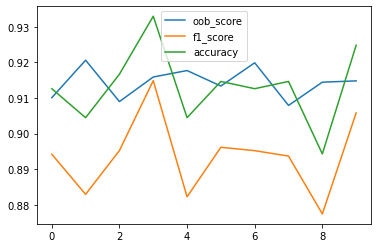

In [81]:
results_df_kbest_chi3.plot()

In [85]:
results_df_kbest_chi3
#6080 features is the optimal solution

,filtering,oob_score,f1_score,accuracy
0,6050,0.910080,0.894229,0.912602
1,6060,0.920595,0.882960,0.904472
2,6070,0.908992,0.895254,0.916667
3,6080,0.915881,0.914855,0.932927
4,6090,0.917694,0.882276,0.904472
5,6100,0.913343,0.896170,0.914634
6,6110,0.919869,0.895215,0.912602
7,6120,0.907904,0.893696,0.914634
8,6130,0.914431,0.877473,0.894309
9,6140,0.914793,0.905806,0.924797


In [91]:
selector = SelectKBest(f_classif, k=7760)
selector.fit(X_kbest, y)
cols = selector.get_support(indices=True)
fclassif_7760 = X_kbest.iloc[:,cols]


C:\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   14    73   130   137   156   217   281   302   353   358   443   884
  1403  1417  1477  1636  1637  1920  1950  1972  1983  1989  1996  2022
  2086  2311  2346  2621  2777  2906  2926  3060  3127  3155  3298  3333
  3367  3524  3575  3733  3749  3750  3834  3961  4141  4145  4177  4221
  4621  4642  4643  4704  4705  4737  4790  4851  4934  4935  4973  5016
  5059  5067  5126  5265  5383  5445  5618  5766  5821  5842  5859  5901
  5903  5918  5946  6014  6021  6043  6066  6068  6086  6197  6274  6278
  6377  6465  6481  6627  6749  6823  6837  6845  7038  7107  7113  7217
  7259  7270  7309  7481  7502  7521  7691  7761  7890  7900  7902  8128
  8160  8183  8238  8333  8416  8543  8547  8703  8816  8868  8981  9060
  9070  9299  9353  9380  9391  9468  9478  9496  9498  9535  9571  9646
  9752  9853  9973 10074 10093 10168 10198 10205 10278 10315 10366 10396
 10438 10746 108

In [93]:
selector = SelectKBest(mutual_info_classif, k=3910)
selector.fit(X_kbest, y)
cols = selector.get_support(indices=True)
mi_3910 = X_kbest.iloc[:,cols]


In [94]:
selector = SelectKBest(chi2, k=6080)
selector.fit(X_kbest, y)
cols = selector.get_support(indices=True)
chi2_6080 = X_kbest.iloc[:,cols]


In [95]:
methods = [fclassif_7760, mi_3910, chi2_6080]
names = ['KBest_fclassif_7760', 'KBest_mutual_info_3910', 'KBest_chi2_6080']

In [98]:
results_df2 = pd.DataFrame(columns=['filtering', 'oob_score', 'f1_score', 'accuracy'])
for i in range(len(methods)):
    print(i)
    m = methods[i]
    filter = names[i]
    print(filter)
    results_list2 = build_rf(m, y, filter)
    print(results_list2)
    df_length = len(results_df2)
    results_df2.loc[df_length] = results_list2

0
KBest_fclassif_7760
['KBest_fclassif_7760', 0.9180565627266135, 0.900704252644628, 0.9166666666666666]
1
KBest_mutual_info_3910
['KBest_mutual_info_3910', 0.9187817258883249, 0.9001271773224682, 0.9186991869918699]
2
KBest_chi2_6080
['KBest_chi2_6080', 0.9089920232052212, 0.9007530276937341, 0.9166666666666666]


In [99]:
results_df2

,filtering,oob_score,f1_score,accuracy
0,KBest_fclassif_7760,0.918057,0.900704,0.916667
1,KBest_mutual_info_3910,0.918782,0.900127,0.918699
2,KBest_chi2_6080,0.908992,0.900753,0.916667


Mutual information method performs again the best

In [ ]:
results_df

## Select Percentile

### f_classif

In [135]:
X_percentile = X.copy(deep=True)
results_df_percentile_f = pd.DataFrame(columns=['filtering', 'oob_score', 'f1_score', 'accuracy'])
for i in range(1,111,5):
    selector = SelectPercentile(f_classif, percentile=i)
    selector.fit(X_percentile, y)
    cols = selector.get_support(indices=True)
    X_percentile_new_f = X_percentile.iloc[:,cols]
    print(X_percentile_new_f.shape)

    results_list = build_rf(X_percentile_new_f, y, str(i))
    df_length = len(results_df_percentile_f)
    results_df_percentile_f.loc[df_length] = results_list


C:\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   14    73   130   137   156   217   281   302   353   358   443   884
  1403  1417  1477  1636  1637  1920  1950  1972  1983  1989  1996  2022
  2086  2311  2346  2621  2777  2906  2926  3060  3127  3155  3298  3333
  3367  3524  3575  3733  3749  3750  3834  3961  4141  4145  4177  4221
  4621  4642  4643  4704  4705  4737  4790  4851  4934  4935  4973  5016
  5059  5067  5126  5265  5383  5445  5618  5766  5821  5842  5859  5901
  5903  5918  5946  6014  6021  6043  6066  6068  6086  6197  6274  6278
  6377  6465  6481  6627  6749  6823  6837  6845  7038  7107  7113  7217
  7259  7270  7309  7481  7502  7521  7691  7761  7890  7900  7902  8128
  8160  8183  8238  8333  8416  8543  8547  8703  8816  8868  8981  9060
  9070  9299  9353  9380  9391  9468  9478  9496  9498  9535  9571  9646
  9752  9853  9973 10074 10093 10168 10198 10205 10278 10315 10366 10396
 10438 10746 108

ValueError: percentile should be >=0, <=100; got 101

In [138]:
results_df_percentile_f

,filtering,oob_score,f1_score,accuracy
0,1,0.679478,0.629758,0.678862
1,6,0.905004,0.885205,0.904472
2,11,0.918419,0.888546,0.906504
3,16,0.911168,0.903042,0.920732
4,21,0.913706,0.890981,0.906504
5,26,0.915518,0.902472,0.920732
6,31,0.913706,0.900246,0.918699
7,36,0.912255,0.893348,0.912602
8,41,0.910080,0.885353,0.904472
9,46,0.914068,0.886962,0.906504


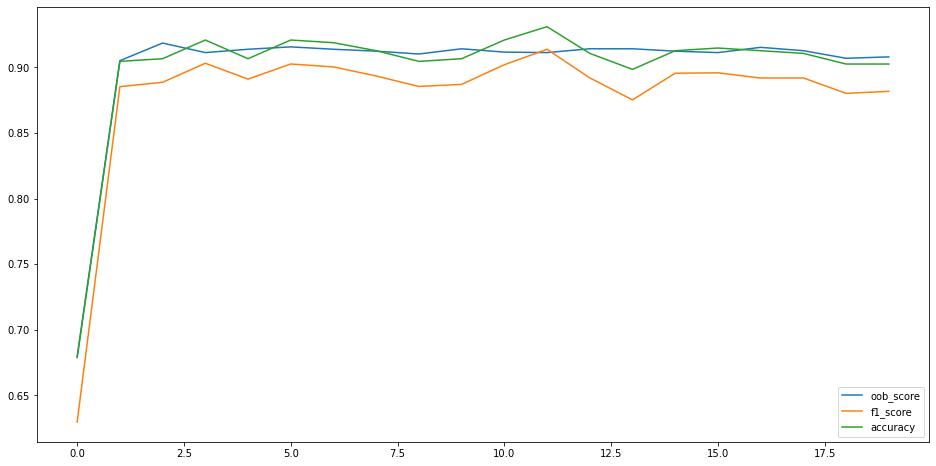

In [139]:
results_df_percentile_f.plot(figsize=(16,8))

In [140]:
#there is a peak in metrics around 55%
X_percentile = X.copy(deep=True)
results_df_percentile_f2 = pd.DataFrame(columns=['filtering', 'oob_score', 'f1_score', 'accuracy'])
for i in range(50,60):
    selector = SelectPercentile(f_classif, percentile=i)
    selector.fit(X_percentile, y)
    cols = selector.get_support(indices=True)
    X_percentile_new_f2 = X_percentile.iloc[:,cols]
    print(X_percentile_new_f2.shape)

    results_list = build_rf(X_percentile_new_f2, y, str(i))
    df_length = len(results_df_percentile_f2)
    results_df_percentile_f2.loc[df_length] = results_list


C:\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   14    73   130   137   156   217   281   302   353   358   443   884
  1403  1417  1477  1636  1637  1920  1950  1972  1983  1989  1996  2022
  2086  2311  2346  2621  2777  2906  2926  3060  3127  3155  3298  3333
  3367  3524  3575  3733  3749  3750  3834  3961  4141  4145  4177  4221
  4621  4642  4643  4704  4705  4737  4790  4851  4934  4935  4973  5016
  5059  5067  5126  5265  5383  5445  5618  5766  5821  5842  5859  5901
  5903  5918  5946  6014  6021  6043  6066  6068  6086  6197  6274  6278
  6377  6465  6481  6627  6749  6823  6837  6845  7038  7107  7113  7217
  7259  7270  7309  7481  7502  7521  7691  7761  7890  7900  7902  8128
  8160  8183  8238  8333  8416  8543  8547  8703  8816  8868  8981  9060
  9070  9299  9353  9380  9391  9468  9478  9496  9498  9535  9571  9646
  9752  9853  9973 10074 10093 10168 10198 10205 10278 10315 10366 10396
 10438 10746 108

In [141]:
results_df_percentile_f2

,filtering,oob_score,f1_score,accuracy
0,50,0.908992,0.885535,0.904472
1,51,0.914068,0.882972,0.902439
2,52,0.911893,0.908057,0.924797
3,53,0.918057,0.903485,0.922764
4,54,0.909355,0.896514,0.918699
5,55,0.913706,0.894804,0.916667
6,56,0.914431,0.900874,0.918699
7,57,0.909717,0.904388,0.920732
8,58,0.911893,0.889679,0.912602
9,59,0.912618,0.895477,0.912602


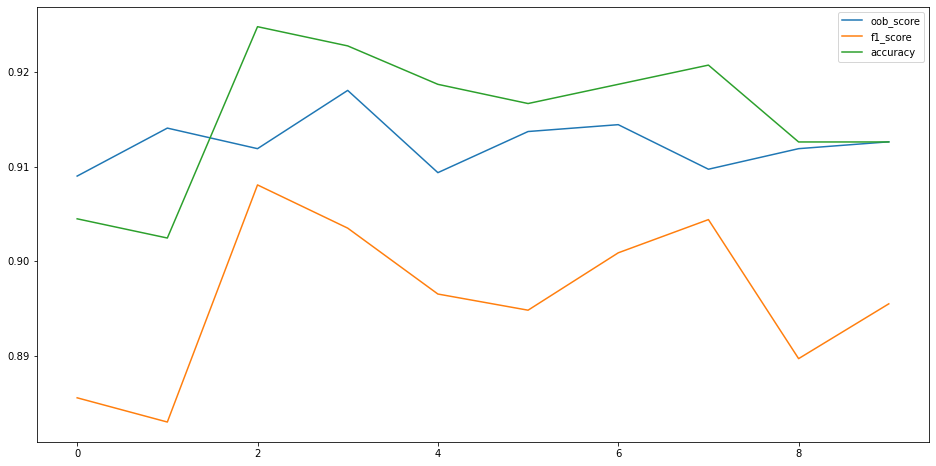

In [142]:
results_df_percentile_f2.plot(figsize=(16,8)) #52 percent is optimal

### mutual_info_classif

In [143]:
X_percentile = X.copy(deep=True)
results_df_percentile_mi = pd.DataFrame(columns=['filtering', 'oob_score', 'f1_score', 'accuracy'])
for i in range(1,101,5):
    selector = SelectPercentile(mutual_info_classif, percentile=i)
    selector.fit(X_percentile, y)
    cols = selector.get_support(indices=True)
    X_percentile_new_mi = X_percentile.iloc[:,cols]
    print(X_percentile_new_mi.shape)

    results_list = build_rf(X_percentile_new_mi, y, str(i))
    df_length = len(results_df_percentile_mi)
    results_df_percentile_mi.loc[df_length] = results_list


(3250, 117)
(3250, 698)
(3250, 1280)
(3250, 1861)
(3250, 2442)
(3250, 3024)
(3250, 3605)
(3250, 4187)
(3250, 4768)
(3250, 5349)
(3250, 5931)
(3250, 6512)
(3250, 7094)
(3250, 7675)
(3250, 8256)
(3250, 8838)
(3250, 9419)
(3250, 10000)
(3250, 10582)
(3250, 11163)


ValueError: percentile should be >=0, <=100; got 101

In [150]:
results_df_percentile_mi

,filtering,oob_score,f1_score,accuracy
0,1,0.904641,0.880605,0.898374
1,6,0.911530,0.877449,0.894309
2,11,0.912255,0.881227,0.898374
3,16,0.919869,0.877020,0.898374
4,21,0.912255,0.897643,0.918699
5,26,0.914431,0.889769,0.910569
6,31,0.912980,0.884579,0.904472
7,36,0.914068,0.899457,0.916667
8,41,0.915518,0.907770,0.924797
9,46,0.914431,0.882547,0.902439


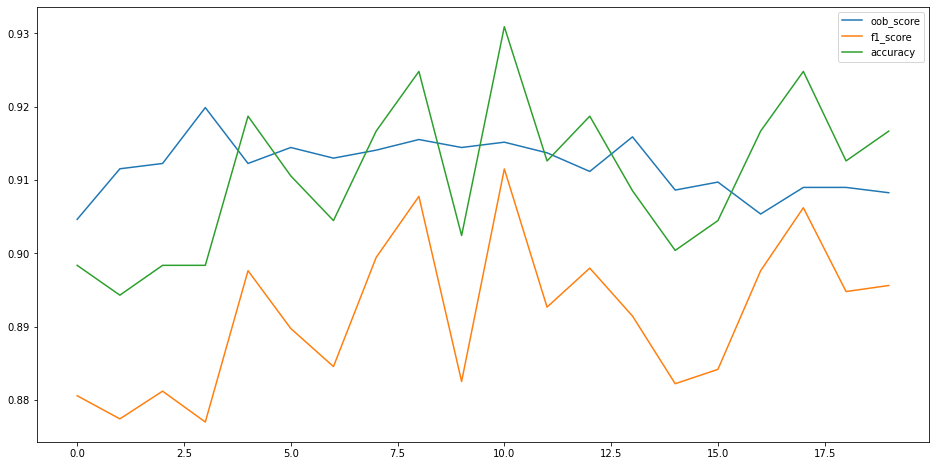

In [151]:
results_df_percentile_mi.plot(figsize=(16,8))

In [152]:
#there is a peak in metrics around 50%
X_percentile = X.copy(deep=True)
results_df_percentile_mi2 = pd.DataFrame(columns=['filtering', 'oob_score', 'f1_score', 'accuracy'])
for i in range(45,55):
    selector = SelectPercentile(mutual_info_classif, percentile=i)
    selector.fit(X_percentile, y)
    cols = selector.get_support(indices=True)
    X_percentile_new_mi2 = X_percentile.iloc[:,cols]
    print(X_percentile_new_mi2.shape)

    results_list = build_rf(X_percentile_new_mi2, y, str(i))
    df_length = len(results_df_percentile_mi2)
    results_df_percentile_mi2.loc[df_length] = results_list


(3250, 5233)
(3250, 5349)
(3250, 5466)
(3250, 5582)
(3250, 5698)
(3250, 5814)
(3250, 5931)
(3250, 6047)
(3250, 6163)
(3250, 6280)


In [156]:
results_df_percentile_mi2#52 features is optimal!

,filtering,oob_score,f1_score,accuracy
0,45,0.910442,0.887879,0.908537
1,46,0.915518,0.899512,0.916667
2,47,0.916606,0.907573,0.922764
3,48,0.913343,0.906388,0.924797
4,49,0.908629,0.880207,0.900407
5,50,0.911530,0.891852,0.912602
6,51,0.914431,0.903796,0.922764
7,52,0.915881,0.910921,0.924797
8,53,0.905366,0.900701,0.916667
9,54,0.916606,0.903589,0.920732


### chi2

In [153]:
X_percentile = X.copy(deep=True)
results_df_percentile_chi2 = pd.DataFrame(columns=['filtering', 'oob_score', 'f1_score', 'accuracy'])
for i in range(1,101,5):
    selector = SelectPercentile(chi2, percentile=i)
    selector.fit(X_percentile, y)
    cols = selector.get_support(indices=True)
    X_percentile_new_chi2 = X_percentile.iloc[:,cols]
    print(X_percentile_new_chi2.shape)

    results_list = build_rf(X_percentile_new_chi2, y, str(i))
    df_length = len(results_df_percentile_chi2)
    results_df_percentile_chi2.loc[df_length] = results_list


(3250, 117)
(3250, 698)
(3250, 1280)
(3250, 1861)
(3250, 2442)
(3250, 3024)
(3250, 3605)
(3250, 4187)
(3250, 4768)
(3250, 5349)
(3250, 5931)
(3250, 6512)
(3250, 7094)
(3250, 7675)
(3250, 8256)
(3250, 8838)
(3250, 9419)
(3250, 10001)
(3250, 10582)
(3250, 11163)


In [154]:
results_df_percentile_chi2

,filtering,oob_score,f1_score,accuracy
0,1,0.913706,0.870341,0.890244
1,6,0.919869,0.910503,0.926829
2,11,0.923133,0.896720,0.916667
3,16,0.927121,0.901134,0.920732
4,21,0.923495,0.882437,0.902439
5,26,0.922408,0.906972,0.924797
6,31,0.912255,0.908064,0.926829
7,36,0.914793,0.896555,0.912602
8,41,0.916969,0.893975,0.910569
9,46,0.915156,0.920499,0.934959


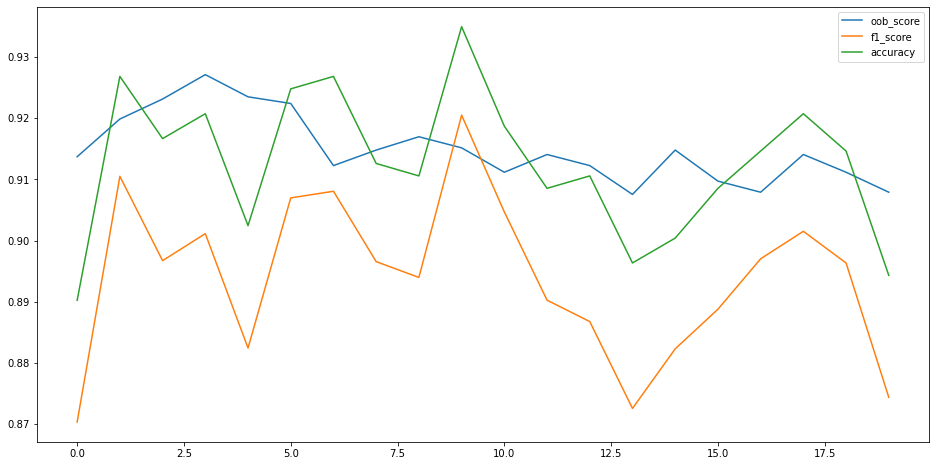

In [155]:
results_df_percentile_chi2.plot(figsize=(16,8))

In [158]:
#there is a peak in metrics around 45%
X_percentile = X.copy(deep=True)
results_df_percentile_chi22 = pd.DataFrame(columns=['filtering', 'oob_score', 'f1_score', 'accuracy'])
for i in range(40,50):
    selector = SelectPercentile(chi2, percentile=i)
    selector.fit(X_percentile, y)
    cols = selector.get_support(indices=True)
    X_percentile_new_chi22 = X_percentile.iloc[:,cols]
    print(X_percentile_new_chi22.shape)

    results_list = build_rf(X_percentile_new_chi22, y, str(i))
    df_length = len(results_df_percentile_chi22)
    results_df_percentile_chi22.loc[df_length] = results_list


(3250, 4652)
(3250, 4768)
(3250, 4884)
(3250, 5001)
(3250, 5117)
(3250, 5233)
(3250, 5349)
(3250, 5466)
(3250, 5582)
(3250, 5698)


In [159]:
results_df_percentile_chi22 #45 is optimal

,filtering,oob_score,f1_score,accuracy
0,40,0.914793,0.907584,0.924797
1,41,0.919507,0.887831,0.908537
2,42,0.914068,0.892356,0.908537
3,43,0.912255,0.897302,0.916667
4,44,0.912255,0.874958,0.896341
5,45,0.916244,0.901670,0.916667
6,46,0.918057,0.892767,0.912602
7,47,0.917331,0.885041,0.906504
8,48,0.914068,0.899996,0.916667
9,49,0.916606,0.884621,0.904472


In [162]:
selector = SelectPercentile(f_classif, percentile=52)
selector.fit(X_kbest, y)
cols = selector.get_support(indices=True)
fclassif_52p = X_kbest.iloc[:,cols]

C:\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   14    73   130   137   156   217   281   302   353   358   443   884
  1403  1417  1477  1636  1637  1920  1950  1972  1983  1989  1996  2022
  2086  2311  2346  2621  2777  2906  2926  3060  3127  3155  3298  3333
  3367  3524  3575  3733  3749  3750  3834  3961  4141  4145  4177  4221
  4621  4642  4643  4704  4705  4737  4790  4851  4934  4935  4973  5016
  5059  5067  5126  5265  5383  5445  5618  5766  5821  5842  5859  5901
  5903  5918  5946  6014  6021  6043  6066  6068  6086  6197  6274  6278
  6377  6465  6481  6627  6749  6823  6837  6845  7038  7107  7113  7217
  7259  7270  7309  7481  7502  7521  7691  7761  7890  7900  7902  8128
  8160  8183  8238  8333  8416  8543  8547  8703  8816  8868  8981  9060
  9070  9299  9353  9380  9391  9468  9478  9496  9498  9535  9571  9646
  9752  9853  9973 10074 10093 10168 10198 10205 10278 10315 10366 10396
 10438 10746 108

In [163]:
selector = SelectPercentile(mutual_info_classif, percentile=52)
selector.fit(X_kbest, y)
cols = selector.get_support(indices=True)
mi_52p = X_kbest.iloc[:,cols]

In [164]:
selector = SelectPercentile(chi2, percentile=45)
selector.fit(X_kbest, y)
cols = selector.get_support(indices=True)
chi2_45p = X_kbest.iloc[:,cols]

In [166]:
methods = [fclassif_52p, mi_52p, chi2_45p]
names = ['KPercentile_fclassif_52', 'KPercentile_mutual_info_52', 'KPercentile_chi2_45']

results_df3 = pd.DataFrame(columns=['filtering', 'oob_score', 'f1_score', 'accuracy'])
for i in range(len(methods)):
    print(i)
    m = methods[i]
    filter = names[i]
    print(filter)
    results_list3 = build_rf(m, y, filter)
    print(results_list3)
    df_length = len(results_df3)
    results_df3.loc[df_length] = results_list3

0
KPercentile_fclassif_52
['KPercentile_fclassif_52', 0.9111675126903553, 0.8793745807409795, 0.9004065040650406]
1
KPercentile_mutual_info_52
['KPercentile_mutual_info_52', 0.9118926758520667, 0.8922055009999749, 0.9105691056910569]
2
KPercentile_chi2_45
['KPercentile_chi2_45', 0.916243654822335, 0.8953635425611732, 0.9166666666666666]


In [167]:
results_df3

,filtering,oob_score,f1_score,accuracy
0,KPercentile_fclassif_52,0.911168,0.879375,0.900407
1,KPercentile_mutual_info_52,0.911893,0.892206,0.910569
2,KPercentile_chi2_45,0.916244,0.895364,0.916667


In [168]:
results_df2

,filtering,oob_score,f1_score,accuracy
0,KBest_fclassif_7760,0.918057,0.900704,0.916667
1,KBest_mutual_info_3910,0.918782,0.900127,0.918699
2,KBest_chi2_6080,0.908992,0.900753,0.916667


The KBest method outperforms the Percentile method, overall is **mutual information the best performing method of feature selection** 

KBest mutual information will be used for the overall feature selection. What will the k be? => 3910

In [14]:
X_c = X.copy(deep=True)
selector = SelectKBest(mutual_info_classif, k=3910)
selector.fit(X_c, y)
cols = selector.get_support(indices=True)


NameError: name 'X_kbest' is not defined

In [15]:
mi_3910 = X_c.iloc[:,cols]

In [16]:
mi_3910

,A0A075B6H7,A0A075B6H9,A0A075B6I0,A0A075B6K4,A0A075B6K5,A0A075B6Q5,A0A075B6S5,A0A0A0MS14,A0A0A0MS15,A0A0B4J1U7,...,Q9Y6U3,Q9Y6V7,Q9Y6W3,Q9Y6W5,Q9Y6X3,Q9Y6X5,Q9Y6X8,Q9Y6X9,Q9Y6Y0,Q9Y6Y8
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000840,...,0.000284,0.0,0.000125,0.000000,0.0,0.000224,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
3246,0.000992,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.001902,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
3247,0.008004,0.0,0.0,0.0,0.0,0.000787,0.0,0.001587,0.00078,0.000767,...,0.000000,0.0,0.000228,0.000746,0.0,0.000000,0.000000,0.0,0.0,0.000371
3248,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000881,0.00000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000123,0.0,0.0,0.000103


In [19]:
atlas_mi_3910 = pd.concat([mi_3910, y], axis=1)

In [20]:
atlas_mi_3910

,A0A075B6H7,A0A075B6H9,A0A075B6I0,A0A075B6K4,A0A075B6K5,A0A075B6Q5,A0A075B6S5,A0A0A0MS14,A0A0A0MS15,A0A0B4J1U7,...,Q9Y6V7,Q9Y6W3,Q9Y6W5,Q9Y6X3,Q9Y6X5,Q9Y6X8,Q9Y6X9,Q9Y6Y0,Q9Y6Y8,tissue_name
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,Brain
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,Brain
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,Brain
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,Brain
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000840,...,0.0,0.000125,0.000000,0.0,0.000224,0.000000,0.0,0.0,0.000000,Brain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,Tonsil
3246,0.000992,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.001902,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,Urinary bladder
3247,0.008004,0.0,0.0,0.0,0.0,0.000787,0.0,0.001587,0.00078,0.000767,...,0.0,0.000228,0.000746,0.0,0.000000,0.000000,0.0,0.0,0.000371,Urinary bladder
3248,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000881,0.00000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000123,0.0,0.0,0.000103,Urinary bladder


In [22]:
atlas_mi_3910.to_csv('atlas_features_mi_3910.csv', index=False)

## Recursive Feature elimination RFE

In [12]:
X.shape

(1128, 4014)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE

rfe = RFE(forest,150) #top 150 features
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=150 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


KeyboardInterrupt: 

In [15]:
from sklearn.pipeline import Pipeline
# define dataset
# create pipeline
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=1000)
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
#remove correlated features because they provide the same information= correlation matrix
correlated_features = set()
correlation_matrix = X.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [14]:
# create pipeline
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=1000)
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy: 0.991 (0.008)


In [16]:
# create pipeline
rfe_100 = RFE(estimator=RandomForestClassifier(), n_features_to_select=100)
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('s',rfe_100),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, error_score='raise')
# report performance
print('Accuracy for 100 features: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


KeyboardInterrupt: 

In [ ]:
# create pipeline
rfe_200 = RFE(estimator=RandomForestClassifier(), n_features_to_select=200)
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('s',rfe_200),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, error_score='raise')
# report performance
print('Accuracy for 200 features: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# create pipeline
rfe_300 = RFE(estimator=RandomForestClassifier(), n_features_to_select=300)
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('s',rfe_300),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, error_score='raise')
# report performance
print('Accuracy for 300 features: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# create pipeline
rfe_400 = RFE(estimator=RandomForestClassifier(), n_features_to_select=400)
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('s',rfe_400),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, error_score='raise')
# report performance
print('Accuracy for 400 features: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# create pipeline
rfe_500 = RFE(estimator=RandomForestClassifier(), n_features_to_select=500)
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('s',rfe_500),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, error_score='raise')
# report performance
print('Accuracy for 500 features: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# create pipeline
rfe_600 = RFE(estimator=RandomForestClassifier(), n_features_to_select=600)
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('s',rfe_600),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, error_score='raise')
# report performance
print('Accuracy for 600 features: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# create pipeline
rfe_700 = RFE(estimator=RandomForestClassifier(), n_features_to_select=700)
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('s',rfe_700),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, error_score='raise')
# report performance
print('Accuracy for 700 features: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# create pipeline
rfe_800 = RFE(estimator=RandomForestClassifier(), n_features_to_select=800)
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('s',rfe_800),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, error_score='raise')
# report performance
print('Accuracy for 800 features: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# create pipeline
rfe_900 = RFE(estimator=RandomForestClassifier(), n_features_to_select=900)
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('s',rfe_900),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, error_score='raise')
# report performance
print('Accuracy for 900 features: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# Lasso and Select from model

In [30]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

clf = LassoCV().fit(X, y)
importance = np.abs(clf.coef_)
print(importance)

ValueError: could not convert string to float: 'PBMC'